In [8]:
using Plots
using Printf

In [9]:
# Define os pesos para os pontos de integração (argumentos: nint -> número de pontos de integração)

function we(nint)
    w = zeros(nint)
    if(nint == 2)
        w[1] = 1.0
        w[2] = 1.0
    elseif(nint == 3)
        w[1] = 5/9
        w[2] = 8/9
        w[3] = 5/9
    elseif(nint == 4)
        w[1] = (18-sqrt(30.))/36;
        w[2] = (18+sqrt(30.))/36;
        w[3] = (18+sqrt(30.))/36;
        w[4] = (18-sqrt(30.))/36;
    elseif(nint == 5)
        w[1] = (322-13*sqrt(70))/900;
        w[2] = (322+13*sqrt(70))/900;
        w[3] =  128/225;
        w[4] = (322+13*sqrt(70))/900;
        w[5] = (322-13*sqrt(70))/900;
    end
    return w
end
;

# Define os pontos de integração (argumentos: nint -> número de pontos de integração)
function pe(nint)
    pt = zeros(nint)
    if(nint == 2)
        pt[1] = -sqrt(3.)/3.;
        pt[2] = sqrt(3.)/3.;
    elseif(nint == 3)
        pt[1] = -sqrt(3/5);
        pt[2] = 0;
        pt[3] = sqrt(3/5);
    elseif(nint == 4)
        pt[1] = sqrt((3+2*sqrt(6/5))/7);
        pt[2] = sqrt((3-2*sqrt(6/5))/7);
        pt[3] = -sqrt((3-2*sqrt(6/5))/7);
        pt[4] = -sqrt((3+2*sqrt(6/5))/7);
    elseif(nint == 5)
        pt[1] = -(1/3)*sqrt((5+2*sqrt(10/7)));
        pt[2] = -(1/3)*sqrt((5-2*sqrt(10/7)));
        pt[3] =   0;
        pt[4] = +(1/3)*sqrt((5-2*sqrt(10/7)));
        pt[5] = +(1/3)*sqrt((5+2*sqrt(10/7)));
    end
    
    return pt
end
;

In [10]:
# Função que define os polinômios de integração (argumentos: typ -> se é o polinômio [1] ou a derivada do polinômio [0]; nen -> número de nós do elemento; nint -> número de pontos de integração)

function shl(typ, nen, nint)
    
    pt = pe(nint)
    w = we(nint)
    
    if(typ == 1)
        sh = zeros(nen, nint)
        for l=1:nint
            t=pt[l];
            if(nen==2)
                sh[1,l] = (1.0-t)/2.0;
                sh[2,l] = (1.0+t)/2.0;
            elseif(nen==3)
                sh[1,l] = t*(t-1.0)/2.0;
                sh[2,l] = -(t-1)*(t+1);
                sh[3,l] = t*(t+1.0)/2.0;
            elseif(nen==4)
                sh[1,l] = -( 9/16)*(t+(1/3))*(t-(1/3))*(t-1);
                sh[2,l] =  (27/16)*(t+1)    *(t-(1/3))*(t-1);
                sh[3,l] = -(27/16)*(t+1)    *(t+(1/3))*(t-1);
                sh[4,l] =  ( 9/16)*(t+1)    *(t+(1/3))*(t-(1/3));
            elseif(nen==5)
                sh[1,l] =  (2/3)*(t+(1/2))*t*(t-(1/2))*(t-1);
                sh[2,l] = -(8/3)*(t+1)*t*(t-(1/2))*(t-1);
                sh[3,l] =      4*(t+1)*(t+(1/2))*(t-(1/2))*(t-1);
                sh[4,l] = -(8/3)*(t+1)*(t+(1/2))*t*(t-1);
                sh[5,l] =  (2/3)*(t+1)*(t+(1/2))*t*(t-(1/2)); 
            end
        end
        return sh
    elseif(typ == 2)
        dsh = zeros(nen, nint)
        for l=1:nint
            t=pt[l];
            if(nen==2)
                dsh[1,l] = (-1.0)/2.0;
                dsh[2,l] = (1.0)/2.0;
            elseif(nen==3)
                dsh[1,l] = (2*t - 1)/2.0;
                dsh[2,l] = -2*t;
                dsh[3,l] = (2*t + 1)/2.0;
            elseif(nen==4)
                dsh[1,l] = -(27*t*t - 18*t - 1)/16;
                dsh[2,l] = 9*(9*t*t - 2*t - 3)/16;
                dsh[3,l] = -9*(9*t*t + 2*t - 3)/16;
                dsh[4,l] = +(27*t*t + 18*t - 1)/16;
            elseif(nen==5)
                dsh[1,l] = (16*(t^3) - 12*(t^2) - 2*t + 1)/6;
                dsh[2,l] = -4*(8*(t^3) - 3*(t^2) - 4*t + 1)/3;
                dsh[3,l] = (16*(t^3) - 10*t)
                dsh[4,l] = -4*(8*(t^3) + 3*(t^2) - 4*t - 1)/3;
                dsh[5,l] = (16*(t^3) + 12*(t^2) - 2*t - 1)/6;
            end
        end
        return dsh
    end
end
;


In [11]:
# Define os intervalos reais do elemento

a = 0
b = +1.0
epsilon = 10^(-3)
;

In [12]:
# Funções auxiliares

function u(x)
    c2 = ( (ℯ^(-1/sqrt(epsilon)) - 1)/(ℯ^(1/sqrt(epsilon)) - ℯ^(-1/sqrt(epsilon))) )
    c1 = -1 - c2
    
    c1 * ℯ^(-x/sqrt(epsilon)) + c2 * ℯ^(x/sqrt(epsilon)) + 1
end
;

function du(x)
    return 3*x^2 - 1
end
;

function trans_x(t, x1, x2)
    return t*(x2 - x1)/2 + (x1 + x2)/2
end

function u_correct(x)
    return 1
end
;

function petrov_galerkin(t, x1, x2, idx, epsilon)
    idx += 1
    x = trans_x(t, x1, x2)
    if idx == 2
        return -((ℯ^((x-x2)/sqrt(epsilon))) - ℯ^(((x2 - x)/sqrt(epsilon))))/((ℯ^((x2 - x1)/sqrt(epsilon)) - ℯ^((x1 - x2)/sqrt(epsilon))))
    elseif idx == 3
        return +((ℯ^((x-x2)/sqrt(epsilon))) - ℯ^(((x2 - x)/sqrt(epsilon))))/((ℯ^((x2 - x1)/sqrt(epsilon)) - ℯ^((x1 - x2)/sqrt(epsilon))))
    end
end
;

In [37]:
# Função principal da simulação do MEF (argumentos: max_degree -> grau máximo do polinômio que irá gerar o número de elementos; folder_to_save -> diretório no qual serão salvas os gráficos gerados na simulação)

function mef(max_degree, folder_to_save) # begin function
    n_values = [4, 8, 10, 12, 16, 32]
    xi = a
    xf = b
    
    # println("Epsilon = $epsilon_ep")
    # definindo as condições de contorno de Dirichlet
    g_a = 0
    g_b = 0
    
    # definindo as condições de contorno de Neumann
    q_a = 0
    q_b = 0
    
    # definindo os Kappas
    kappa_a = (10^6)
    kappa_b = (10^6)
    
    simulation_times = zeros(size(n_values)[1], 4)
    line, column = 0, 0
    
    for nel in n_values #f1
        line += 1
        column = 1
        for k in 1:1 #f2
            elapsed_time = @elapsed begin
            nint = k + 1 # número de pontos de integração na malha
            nen = nint # número de elementos na malha
            
            np = nel*k + 1 # número de nós na malha
            
            x = LinRange(xi, xf, np)
            M = zeros(np, np)
            F = zeros(np)

            shg  = shl(1, nen, nint)
            dshg = shl(2, nen, nint)
            dshg = reverse((dshg))
            
            t = pe(nint)
            w = we(nint)

            idx = 1
            
            h = (x[k+1] - x[1])
            println("h = $h")
            for n in 1:(nel) #f3
                Me = zeros(nint, nint)
                Fe = zeros(nint)
                
                for l in 1:(nint) #f4
                    tt = t[l]
                    ww = w[l]
                    xx = trans_x(tt, x[idx], x[idx+k])
                    for j in 1:(nen) #f5
                        Fe[j] += u_correct(xx) * shg[j, l] * ww * h/2

                        for i in 1:nen #f6
                            Me[i, j] += epsilon * dshg[i, l] * dshg[j, l] * ww * 2/h
                            Me[i, j] += shg[i, l] * shg[j, l] * ww * h/2
                        end #ef6
                            
                    end #ef5
                    
                end #ef4

                for i in 0:nint-1 #f7
                    F[idx+i] += Fe[i+1]
                    for j in 0:nint-1 #f8
                        M[idx+i, idx+j] += Me[i+1, j+1]
                    end #ef7
                end #ef7
                idx += k
            end #ef3
            
            # aplicando as condições de contorno
            
            M[1, 1] += kappa_a
            F[1] += kappa_a*g_a - q_a
            
            M[size(M)[1], size(M)[2]] += kappa_b
            F[size(F)[1]] += kappa_b*g_b - q_b
            
            # resolvendo o sistema linear 
            alphas = M\F
            end
            
            simulation_times[line, column] += elapsed_time
            column += 1
            
            # plotando os gráficos
            fig = plot(size=(1000, 500))
            plot!(x, alphas, label="aproximacao MEF", color="blue")  # Continuous line
            plot!(x, alphas, label="Aproximação MEF no ponto", color="black", seriestype=:scatter, ms=5.5)  # Scatter plot for MEF
            plot!(range(a, stop=b, length=500), x -> u(x), seriestype=:scatter, label="analitica", ms=2.5, color="red")  # Scatter plot
            title!("Grau = $k - nel = $nel")
            plot!(grid=true)
            # savefig(joinpath(folder_to_save, "grafico_nel_$(nel)_grau$(k).png"))
            display(fig)
                    
        end #ef2
        
    end #ef1
    return simulation_times
end # end function
;

h = 0.25


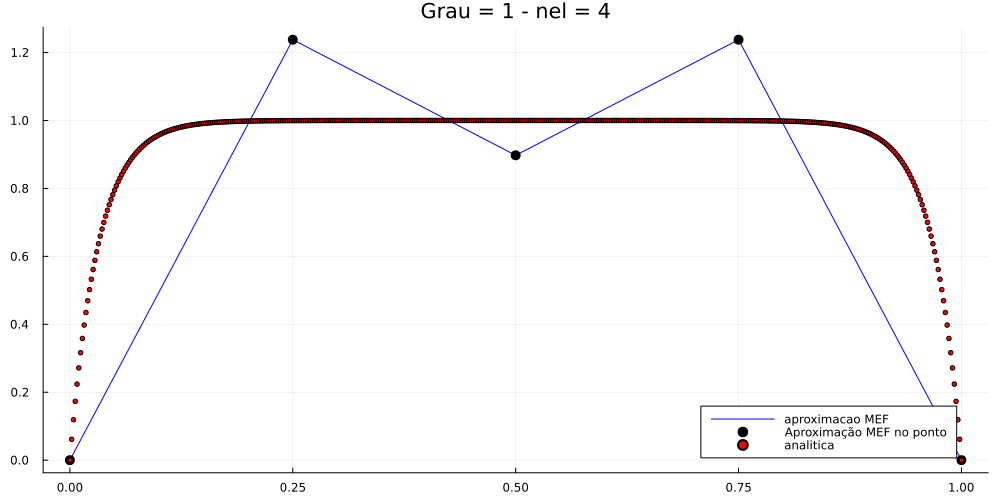

h = 0.125


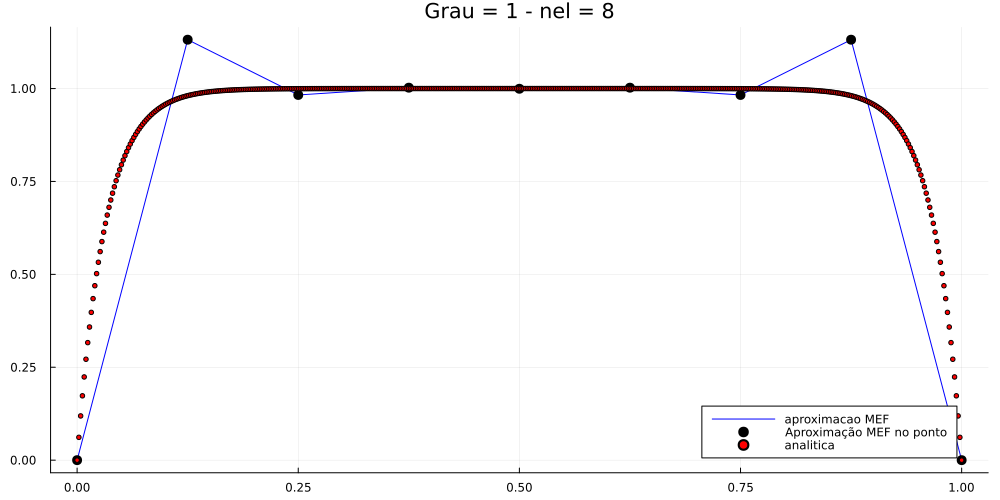

h = 0.1


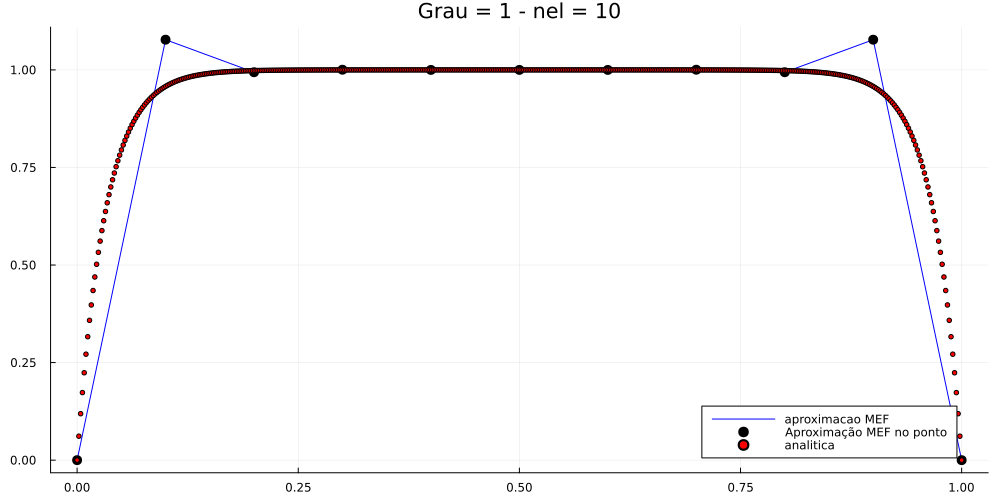

h = 0.08333333333333333


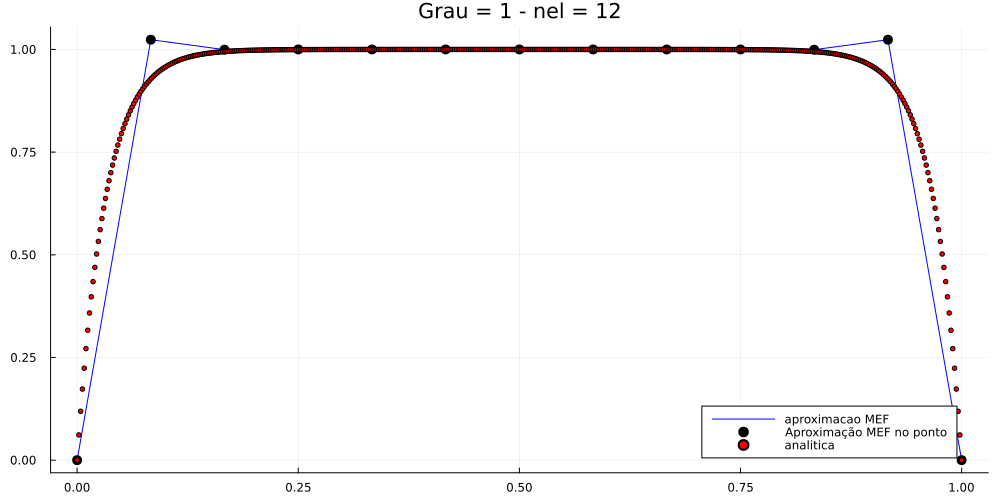

h = 0.0625


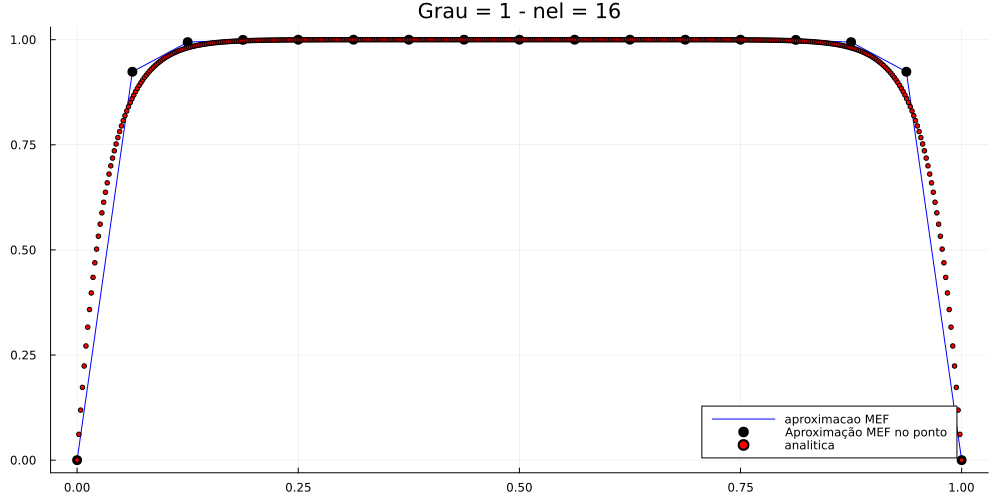

h = 0.03125


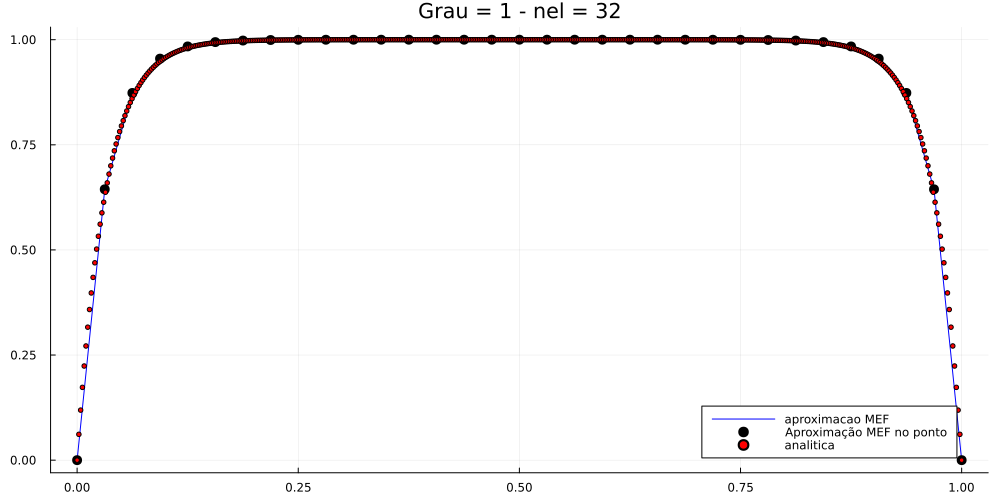

Tempo gasto no total da simulação: 4.3944e-01
for nel = 4: [8.7109e-5, 0.0, 0.0, 0.0]
for nel = 16: [7.363e-5, 0.0, 0.0, 0.0]
for nel = 64: [6.878e-5, 0.0, 0.0, 0.0]
for nel = 256: [6.51e-5, 0.0, 0.0, 0.0]
for nel = 1024: [0.00010488, 0.0, 0.0, 0.0]
for nel = 4096: [0.004729245, 0.0, 0.0, 0.0]


In [38]:
folder_path = "graficos/"

if !isdir(folder_path)
    mkdir(folder_path)
end
;

subfolder_name = "simulacao_do_MEF_a1"

full_path = joinpath(folder_path, subfolder_name)

if !isdir(full_path)
    mkdir(full_path)
end

elapsed_time = @elapsed begin
    simulation_times = mef(5, full_path)
end

print("Tempo gasto no total da simulação: ")
@printf("%.4e\n", elapsed_time)

for i in 1:size(simulation_times, 1)
    nel = 4^i
    print("for nel = $nel: ")
    println(simulation_times[i, :])
end


In [15]:
sqrt(6*epsilon)

0.07745966692414834